In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.io.wavfile import read, write
from IPython.display import Audio
from sympy import symbols
import math
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

## Load Audio

In [2]:
#Audio
file_audio=('../audios/recording.wav')
fs,x=read(file_audio)
x=x/float(max(abs(x)))
x=x-np.mean(x)
t=np.arange(0,float(len(x))/fs,1/fs)
#Audio(x,rate=fs)

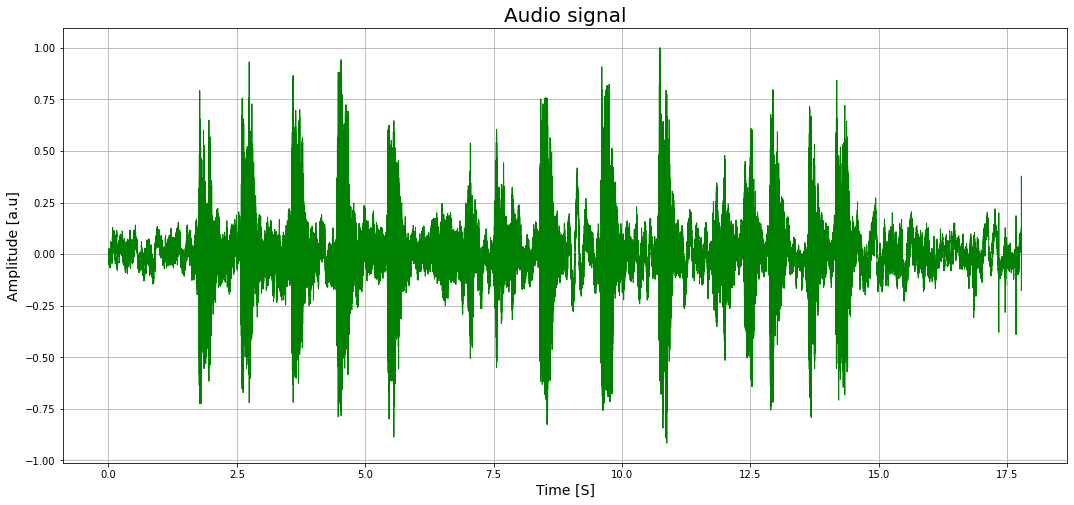

In [3]:
plt.figure(figsize=(18,8))
plt.plot(t,x,linewidth=1,color="g")
plt.xlabel("Time [S]",fontsize=14)
plt.ylabel("Amplitude [a.u]",fontsize=14)
plt.title("Audio signal",fontsize=20)
plt.grid()
plt.show()

## Parameters for the FIR Frequency Sampling Method

In [4]:
N=91
fc1=2000
fc2=10000

ftype="Lowpass"

#fs=18000

## Superior Limit for the IFT and sets the Frequency Response of the Filter

In [5]:
#Limit for the IFT
if (N%2!=0):
    limit=(N-1)/2
else:
    limit=N/2 - 1
limit=int(limit)

#Sampling steps
fk=fs/N
samples=[i if N%2 else i+0.5 for i in range(limit+1)]
hk=[]
if (ftype=="Lowpass"):
    for i in samples:
        if (fk*i<=fc1):
            hk.append(1)
        else:
            hk.append(0)
elif(ftype=="Highpass"):
    for i in samples:
        if (fk*i<=fc1):
            hk.append(0)
        else:
            hk.append(1)
elif(ftype=="Bandpass"):
    for i in samples:
        if (fk*i<=fc1 & fk*i>=fc2):
            hk.append(0)
        else:
            hk.append(1)       
elif(ftype=="Bandstop"):
    for i in samples:
        if (fk*i>=fc1 & fk*i<=fc2):
            hk.append(0)
        else:
            hk.append(1)


## Gets the Positive Coefficients for the Filter (IFT)

In [6]:
alfa=(N-1)/2

hn=np.zeros(limit+1)
for n in range(limit+1):
    acc=0
    for k in range(1,limit+1):
        acc+=2*hk[k]*np.cos((2*np.pi*k*(n-alfa))/N)
    acc=(1/N)*(acc+hk[0])
    hn[n]=acc

## Complete Coefficients (Simetry and Lineal Phase)

In [7]:
if (N%2!=0):
    htemp=np.flip(hn[:-1])
else:
    htemp=np.flip(hn)
    
h=np.concatenate((hn,htemp))
W,H=signal.freqz(h,1,whole=True, worN=1024)

## Output Filter

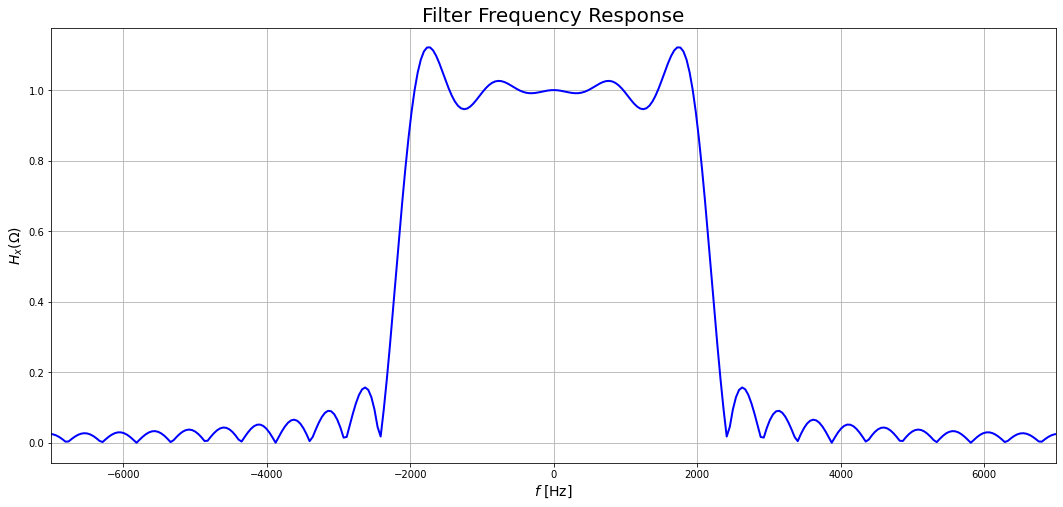

In [8]:
plt.figure(figsize=(18,8))
plt.plot((W-np.pi)*fs/(2*np.pi),np.abs(np.fft.fftshift(H)),linewidth=2,color="b")
plt.xlim(-fc1-5000,fc1+5000)
plt.xlabel("$f$ [Hz]",fontsize=14)
plt.ylabel("$H_x (\Omega)$",fontsize=14)
plt.title("Filter Frequency Response",fontsize=20)
plt.grid()
plt.show()

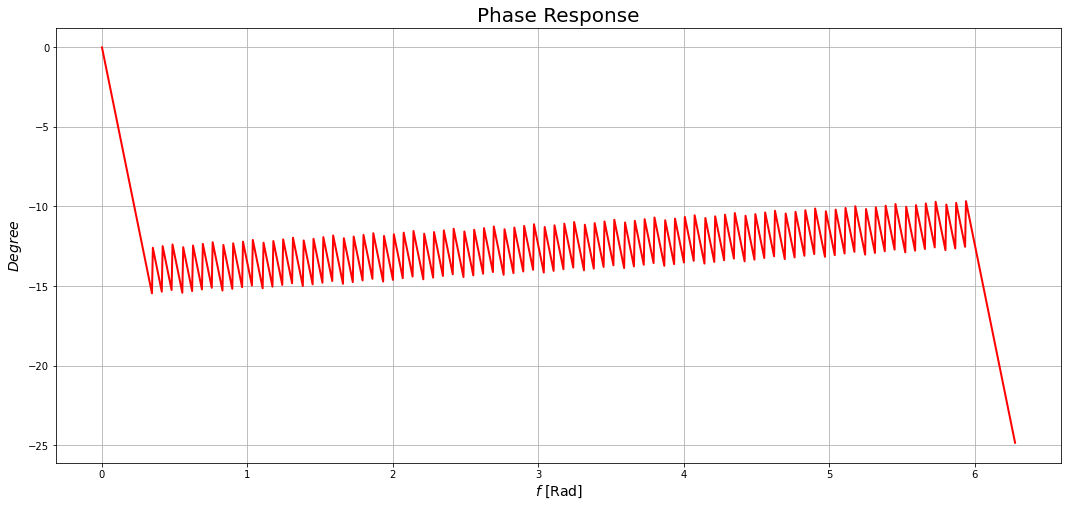

In [10]:
angles=np.unwrap(np.angle(H))

plt.figure(figsize=(18,8))
plt.plot(W,angles,linewidth=2,color="r")
plt.xlabel("$f$ [Rad]",fontsize=14)
plt.ylabel("$Degree$",fontsize=14)
plt.title("Phase Response",fontsize=20)
plt.grid()
plt.show()

In [11]:
y=signal.lfilter(h,1,x)              # x is the audio
#Audio(y,rate=fs)

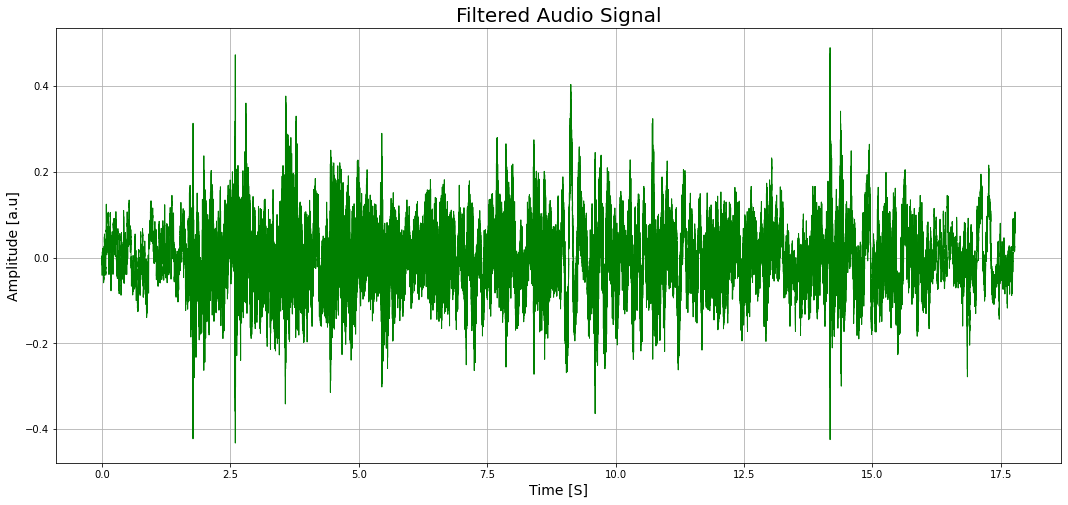

In [13]:
plt.figure(figsize=(18,8))
plt.plot(t,y,linewidth=1,color="g")
plt.xlabel("Time [S]",fontsize=14)
plt.ylabel("Amplitude [a.u]",fontsize=14)
plt.title("Filtered Audio Signal",fontsize=20)
plt.grid()
plt.show()